In [394]:
#importing all necessary libraries 
import pandas as pd #Tabular Data Management 
import numpy as np #Mathematical Calculations
import sympy as sp #Complex Calculations
import seaborn as sns #Plotting using mapping
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [395]:
#reading and initializing dataset
dt = pd.read_csv('/content/heart_failur_classification_dataset.csv')
dt


,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,62.0,0,61,1,38,1,155000.00,1.1,143.0,Male,Yes,270.0,0
295,295,55.0,0,1820,0,38,0,270000.00,1.2,NaN,Female,No,271.0,0
296,296,45.0,0,2060,1,60,0,742000.00,0.8,138.0,Female,No,278.0,0
297,297,45.0,0,2413,0,38,0,140000.00,1.4,140.0,Male,Yes,280.0,0


In [396]:
dt.shape

(299, 14)

In [397]:
#Finding number of null values in the dataset
dt.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [398]:
#dropping unwanted column as it was of no use.
dt = dt.drop(['Unnamed: 0'],axis =1)
dt.shape

(299, 13)

In [399]:
dt.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [400]:
#creating subsets 
print("Number of rows with null values in serum_sodium:", dt['serum_sodium'].isnull().sum())
print("Number of rows with null values in time:", dt['time'].isnull().sum())
data_subset = dt[dt['serum_sodium'].notnull()]
print("Shape after removing null values:", data_subset.shape)

Number of rows with null values in serum_sodium: 6
Number of rows with null values in time: 7
Shape after removing null values: (293, 13)


In [401]:
#removing null values
print('Shape of Dataframe before dropping:', dt.shape)
dt = dt.dropna(axis=0, subset = ['serum_sodium'])
print('Shape of Dataframe after dropping:', dt.shape)

Shape of Dataframe before dropping: (299, 13)
Shape of Dataframe after dropping: (293, 13)


In [402]:
#creating subset
data_subset = dt[dt['time'].notnull()]
print("Shape after removing null values:", data_subset.shape)

Shape after removing null values: (286, 13)


In [403]:
#removing null values
print('Shape of Dataframe before dropping:', dt.shape)
dt = dt.dropna(axis=0, subset = ['time'])
print('Shape of Dataframe after dropping:', dt.shape)

Shape of Dataframe before dropping: (293, 13)
Shape of Dataframe after dropping: (286, 13)


In [404]:
#checking for null values abscenece 
dt.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [405]:
#replacing/Encoding string data into numerical
dt['sex'].replace({'Male':1, 'Female':0}, inplace=True)
dt['smoking'].replace({'Yes':1, 'No':0}, inplace=True)


In [406]:
#determinging features and Lables
X = dt[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
Y = dt[['DEATH_EVENT']]

In [407]:
from sklearn.model_selection import train_test_split #splitting dataset into Training set and Test set
#import random
#random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(228, 12)
(58, 12)
(228, 1)
(58, 1)


In [408]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #calling the MinMax scaling algorithm and storing it.
scaler.fit(X) #scaling the x training values of the dataset
#dt_scale=pd.DataFrame(scaler.transform(X))
X_train_scaled = scaler.transform(X_train) #storing the scaled and transformed values of X_train in another varibale
X_test_scaled = scaler.transform(X_test) #storing the scaled and transformed values of X_test in another varibale

In [409]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

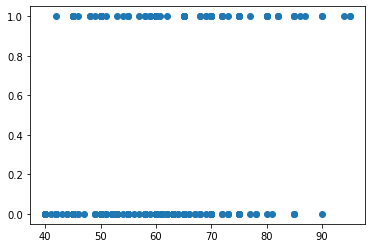

In [410]:
n=0
plt.scatter (X[X.columns[n]],Y) # where n is the coloumn in X dataset you wish to visualise with your dataset
                                # This is to just let you help visualise your data, its impossible to view the whole dataset together.

In [411]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(dt[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']], c=dt['DEATH_EVENT'], figsize=(12,12), alpha=1)

The next Steps are for Support Vector Machines.



In [412]:
from sklearn.svm import SVC # Support Vector Machines 
svc = SVC(kernel='linear')
svc.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [413]:
print("Training accuracy of the model is {:.2f}".format(svc.score(X_train_scaled, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(X_test_scaled, Y_test)))
predictions_svc = svc.predict(X_test_scaled)
print(predictions_svc)
score_svc = svc.score(X_test_scaled, Y_test) #made for plotting purposes later

Training accuracy of the model is 0.87
Testing accuracy of the model is 0.79
[0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]


[[35  9]
 [ 3 11]]


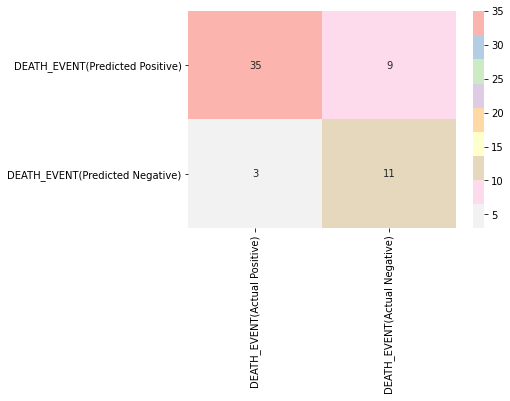

In [414]:
from sklearn.metrics import confusion_matrix #for seeing the True/False Positives/Negatives.
mat=confusion_matrix(predictions_svc, Y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['DEATH_EVENT(Actual Positive)', 'DEATH_EVENT(Actual Negative)'], yticklabels=['DEATH_EVENT(Predicted Positive)','DEATH_EVENT(Predicted Negative)'], annot=True)

The Next Steps are for Neural Networks

In [415]:
from sklearn.neural_network import MLPClassifier # Neural Networks
nnc = MLPClassifier(hidden_layer_sizes=(10), activation='relu', max_iter=10000)
nnc.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [416]:
print("Training accuracy of the model is {:.2f}".format(nnc.score(X_train_scaled, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(nnc.score(X_test_scaled, Y_test)))
predictions_nnc = nnc.predict(X_test_scaled)
print(predictions_nnc)
score_nnc = nnc.score(X_test_scaled, Y_test) #made for plotting purposes later

Training accuracy of the model is 0.86
Testing accuracy of the model is 0.74
[0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1]


[[35 12]
 [ 3  8]]


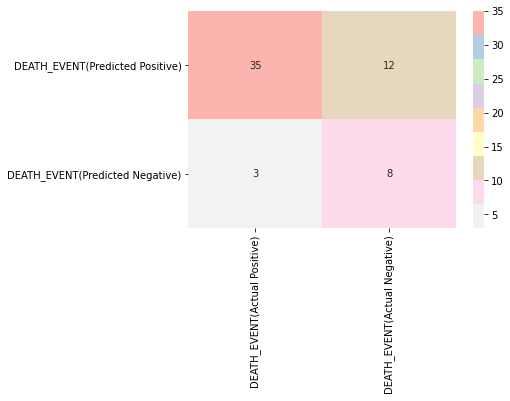

In [417]:
from sklearn.metrics import confusion_matrix #for seeing the True/False Positives/Negatives.
mat=confusion_matrix(predictions_nnc, Y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['DEATH_EVENT(Actual Positive)', 'DEATH_EVENT(Actual Negative)'], yticklabels=['DEATH_EVENT(Predicted Positive)','DEATH_EVENT(Predicted Negative)'], annot=True)

The Next Steps are for Ensemble Classifier (Random Forest)

In [418]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [419]:
print("Training accuracy of the model is {:.2f}".format(rfc.score(X_train_scaled, Y_train)))
print("Testing accuracy of the model is {:.2f}".format(rfc.score(X_test_scaled, Y_test)))
predictions_rfc = rfc.predict(X_test_scaled)
print(predictions_rfc)
score_rfc = rfc.score(X_test_scaled, Y_test) #made for plotting purposes later

Training accuracy of the model is 0.99
Testing accuracy of the model is 0.78
[1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]


[[35 10]
 [ 3 10]]


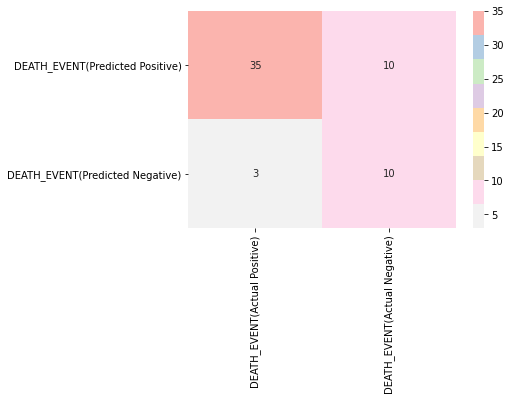

In [420]:
from sklearn.metrics import confusion_matrix #for seeing the True/False Positives/Negatives.
mat=confusion_matrix(predictions_rfc, Y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['DEATH_EVENT(Actual Positive)', 'DEATH_EVENT(Actual Negative)'], yticklabels=['DEATH_EVENT(Predicted Positive)','DEATH_EVENT(Predicted Negative)'], annot=True)

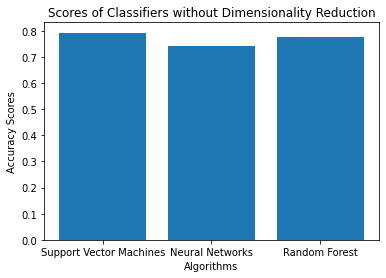

In [421]:
accuracies = ['Support Vector Machines', 'Neural Networks', 'Random Forest']
range = [score_svc, score_nnc, score_rfc]
plt.bar(accuracies,range)
plt.title('Scores of Classifiers without Dimensionality Reduction')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')
plt.show()

The Next part does all the above with PCA implemented

In [422]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

In [423]:
principal_components = pca.fit_transform(dt)
print(principal_components)

[[ 1.51012033e+03  7.27876858e+03 -1.16227365e+02 -2.85581427e+00
   4.86821360e+00  2.24171902e+00]
 [-9.98499413e+04 -4.09489522e+02 -1.21013510e+02  1.44298625e+01
  -9.14362477e+00  5.52432275e+00]
 [-5.18499521e+04 -4.57133021e+02 -1.21260375e+02  2.28703450e+01
   3.00783970e+00 -2.20695433e+00]
 ...
 [-1.06849959e+05 -4.92891083e+02  1.42144691e+02 -2.83203759e+00
  -3.49702378e+00 -5.98919252e+00]
 [ 4.80150548e+05  1.35127721e+03  1.43533564e+02 -1.01542857e+01
   1.48545957e+01  2.05986797e+00]
 [-1.21849338e+05  1.86306931e+03  1.55005335e+02  4.28882885e+00
   8.99967861e+00 -2.11996484e+00]]


In [424]:
pca.explained_variance_ratio_

array([9.99891526e-01, 1.07787539e-04, 6.53457338e-07, 1.65009726e-08,
       1.40583855e-08, 2.09295735e-09])

In [425]:
sum(pca.explained_variance_ratio_)

0.9999999997472987

In [426]:
principal_dt= pd.DataFrame(data= principal_components, columns= ["principle component 1","principle component 2", "principle component 3", "principle component 4", "principle component 5", "principle component 6"])
principal_dt
dt.reset_index(drop=True, inplace=True)
main_dt= pd.concat([principal_dt, dt[["DEATH_EVENT"]]], axis=1)
main_dt

,principle component 1,principle component 2,principle component 3,principle component 4,principle component 5,principle component 6,DEATH_EVENT
0,1510.120332,7278.768577,-116.227365,-2.855814,4.868214,2.241719,1
1,-99849.941342,-409.489522,-121.013510,14.429863,-9.143625,5.524323,1
2,-51849.952129,-457.133021,-121.260375,22.870345,3.007840,-2.206954,1
3,65150.056567,-439.013064,-122.612272,15.918326,-11.728348,18.736469,1
4,-57849.968875,-519.605027,-121.432645,-16.117217,-18.495271,3.768437,1
...,...,...,...,...,...,...,...
281,120150.066608,-423.743019,127.078815,4.225356,2.249870,-2.641236,0
282,-82849.949179,-457.221997,141.728312,-0.499770,-6.679350,0.781099,0
283,-106849.959364,-492.891083,142.144691,-2.832038,-3.497024,-5.989193,0
284,480150.547833,1351.277211,143.533564,-10.154286,14.854596,2.059868,0


In [427]:
#determinging features and Lables
X_pca = main_dt[["principle component 1","principle component 2", "principle component 3", "principle component 4", "principle component 5", "principle component 6"]]
Y_pca = main_dt[['DEATH_EVENT']]

In [428]:
x_train, x_test, y_train, y_test = train_test_split(X_pca,Y_pca,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(228, 6)
(58, 6)
(228, 1)
(58, 1)


The next Steps are for Support Vector Machines with PCA.



In [429]:
from sklearn.svm import SVC # Support Vector Machines 
svc_pca = SVC(kernel = 'rbf')
svc_pca.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [430]:
print("Training accuracy of the model is {:.2f}".format(svc_pca.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc_pca.score(x_test, y_test)))
predictions_svc_pca = svc_pca.predict(x_test)
print(predictions_svc_pca)
score_svc_pca = svc_pca.score(x_test, y_test) #made for plotting purposes later

Training accuracy of the model is 0.70
Testing accuracy of the model is 0.62
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


[[35  9]
 [ 3 11]]


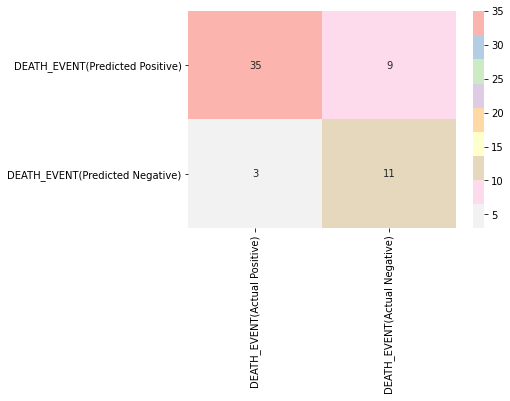

In [431]:
from sklearn.metrics import confusion_matrix #for seeing the True/False Positives/Negatives.
mat=confusion_matrix(predictions_svc, Y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['DEATH_EVENT(Actual Positive)', 'DEATH_EVENT(Actual Negative)'], yticklabels=['DEATH_EVENT(Predicted Positive)','DEATH_EVENT(Predicted Negative)'], annot=True)

The next Steps are for Neural Networks with PCA.



In [432]:
#from sklearn.neural_network import MLPClassifier # Neural Networks
nnc_pca = MLPClassifier(hidden_layer_sizes=(10), activation='relu', max_iter=10000)
nnc_pca.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [433]:
print("Training accuracy of the model is {:.2f}".format(nnc_pca.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(nnc_pca.score(x_test, y_test)))
predictions_nnc_pca = nnc_pca.predict(x_test)
print(predictions_nnc_pca)
score_nnc_pca = nnc_pca.score(x_test, y_test) #made for plotting purposes later

Training accuracy of the model is 0.65
Testing accuracy of the model is 0.69
[1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]


[[31 11]
 [ 7  9]]


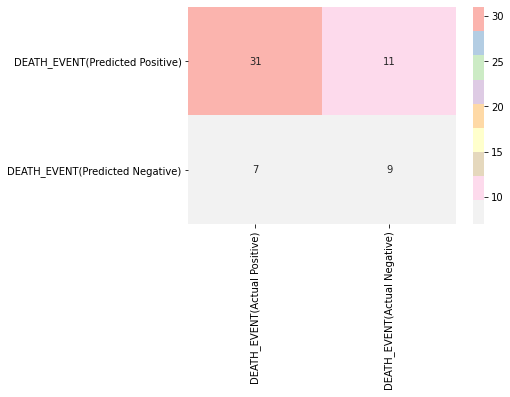

In [434]:
from sklearn.metrics import confusion_matrix #for seeing the True/False Positives/Negatives.
mat=confusion_matrix(predictions_nnc_pca, y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['DEATH_EVENT(Actual Positive)', 'DEATH_EVENT(Actual Negative)'], yticklabels=['DEATH_EVENT(Predicted Positive)','DEATH_EVENT(Predicted Negative)'], annot=True)

The next Steps are for Ensemble Classifier (Random Forest) with PCA.



In [435]:
#from sklearn.ensemble import RandomForestClassifier
rfc_pca = RandomForestClassifier(n_estimators=10)
rfc_pca.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [436]:
print("Training accuracy of the model is {:.2f}".format(rfc_pca.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(rfc_pca.score(x_test, y_test)))
predictions_rfc_pca = rfc_pca.predict(x_test)
print(predictions_rfc_pca)
score_rfc_pca = rfc_pca.score(x_test, y_test) #made for plotting purposes later

Training accuracy of the model is 0.99
Testing accuracy of the model is 0.79
[1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]


[[35  9]
 [ 3 11]]


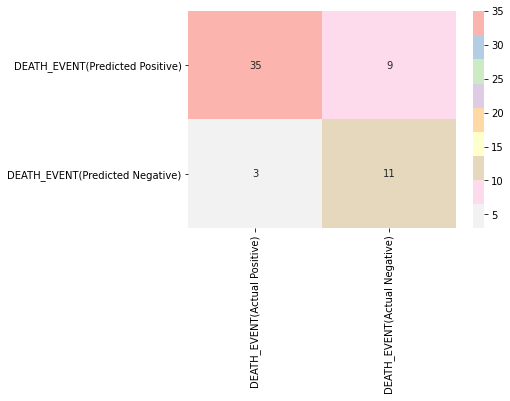

In [437]:
from sklearn.metrics import confusion_matrix #for seeing the True/False Positives/Negatives.
mat=confusion_matrix(predictions_rfc_pca, y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['DEATH_EVENT(Actual Positive)', 'DEATH_EVENT(Actual Negative)'], yticklabels=['DEATH_EVENT(Predicted Positive)','DEATH_EVENT(Predicted Negative)'], annot=True)

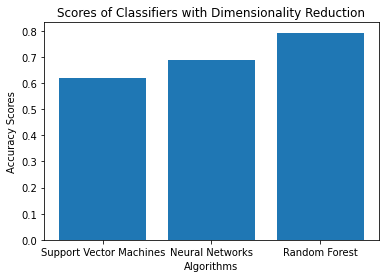

In [438]:
accuracies = ['Support Vector Machines', 'Neural Networks', 'Random Forest']
range = [score_svc_pca, score_nnc_pca, score_rfc_pca]
plt.bar(accuracies,range)
plt.title('Scores of Classifiers with Dimensionality Reduction')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')
plt.show()

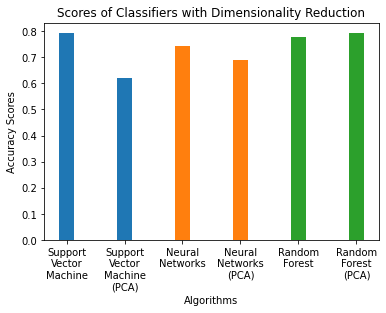

In [439]:
accuracies1 = ['Support\nVector\nMachine', 'Support\nVector\nMachine\n(PCA)']
accuracies2 = ['Neural\nNetworks', 'Neural\nNetworks\n(PCA)']
accuracies3 = ['Random\nForest', 'Random\nForest\n(PCA)']
bar1 = [score_svc, score_svc_pca]
bar2 = [score_nnc, score_nnc_pca]
bar3 = [score_rfc, score_rfc_pca]
#range = [score_svc, score_svc_pca, score_nnc, score_nnc_pca, score_rfc, score_rfc_pca]
barWidth = 0.25
plt.bar(accuracies1, bar1, width=barWidth)
plt.bar(accuracies2, bar2, width=barWidth)
plt.bar(accuracies3, bar3, width=barWidth)
plt.title('Scores of Classifiers with Dimensionality Reduction')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')
plt.show()